Data availability:
    centrum : from 2019-02-07 continuous
    com: 2018-11-04 2019-04-30 and 219-10-21 continuous
    hu: continuous

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from sklearn.linear_model import LinearRegression

In [2]:
def distplot(col='price', std = 1):
    '''
    visualise given column (col) distribution with mean and margin border (std)
    '''
    cuts = last[col].std()*std
    xpos,xneg = last[col].mean()+cuts,last[col].mean()-cuts
    
    last[col].plot(kind='density')
    plt.plot((last[col].mean(),last[col].mean()),(0, 0.05), c='red')
    plt.plot((xpos,xpos),(0, 0.05), c='red')
    plt.plot((xneg,xneg),(0, 0.05), c='red')
    plt.text(last[col].mean()*1.05, 0.05, 'Mean', color='r', va = 'top')
    plt.text(xpos*1.05, 0.051, ('+ Std {}\n  {} ').format(std,round(xpos,1)), color='r', ha= 'left', va='top')
    plt.text(xneg*1.05, 0.051, ('-Std{}\n  {}').format(std, round(xneg)), color='r', va= 'top')
    plt.show()
    
def outlayer(std = 2):
    '''
    Cut the outlayers with the given multiplication of std (2)
    '''
    print('Number of ads: ', last.shape[0])
    lastn = last.loc[last['price'] < (last['price'].mean()+(last.price.std()*std))]
    print('No of ads after trim: ', lastn.shape[0])
    return lastn

In [20]:
db = pd.read_csv('VkerDB.csv')
db['source'] = db.source.astype('category')
#db['room'] = db.room.astype('category')
db.sort_values('date', inplace = True)
db.reset_index(drop = True, inplace = True)
db.shape

(3196, 11)

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 11 columns):
id             3196 non-null int64
date           3196 non-null object
price          3196 non-null float64
price_sqm      3196 non-null int64
room           3196 non-null category
sqm            3196 non-null float64
region         2145 non-null object
description    1268 non-null object
agency         1010 non-null object
source         3196 non-null category
url            3196 non-null object
dtypes: category(2), float64(2), int64(2), object(5)
memory usage: 231.3+ KB


In [17]:
#price prediction for give date

The available advetisments for the prediction:  96


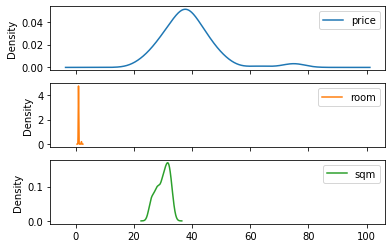

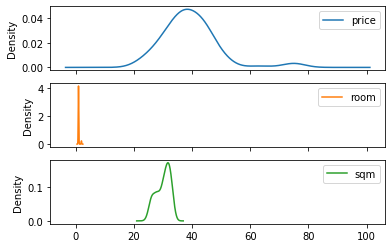

In [21]:
last = db.loc[db['date'] == db['date'].unique()[-1], ['price', 'room','sqm']]
last2 = db.loc[db['date'] == db['date'].unique()[-2], ['price', 'room','sqm']]
print('The available advetisments for the prediction: ', last.shape[0])
last.plot(kind='density', subplots=True)
last2.plot(kind='density', subplots=True);

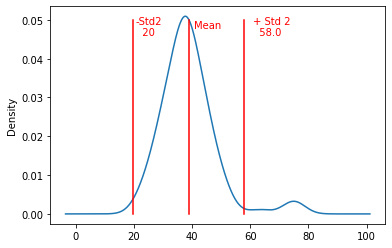

In [11]:
distplot('price',std=2)

In [12]:
lastn = outlayer()

Number of ads:  96
No of ads after trim:  92


In [22]:
X = lastn[['sqm', 'room']]
y = lastn['price'].values

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalery = StandardScaler()
scaler.fit(X)
Xsc = scaler.transform(X)
#ysc = scalery.fit_transform(y.reshape(-1,1))

In [24]:
linsc = LinearRegression()
linsc.fit(Xsc,y)
q = scaler.transform([[30,1]])
rec = round(linsc.predict(q)[0], 2)
print('Recommended price: ', rec)

Recommended price:  37.76


In [25]:
q[0]

array([ 0.0651214 , -0.21320072])

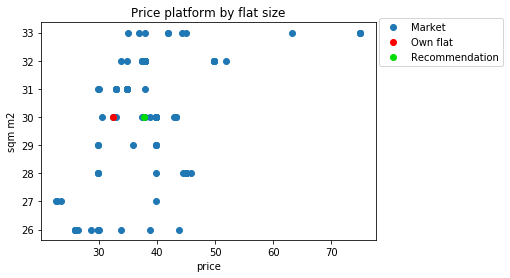

In [26]:
plt.scatter(last['price'],last['sqm'], label = 'Market')
plt.scatter(32.5,30, c='r', label = 'Own flat')
plt.scatter(rec,30, c = '#00dd00', label= 'Recommendation')
plt.xlabel('price')
plt.ylabel('sqm m2')
plt.title('Price platform by flat size')
plt.legend(loc = (1.01,0.8))
plt.show()